In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [2]:
oecd_bli = pd.read_csv('datasets/life-satisfaction/oecd_bli.csv', thousands=',')
gdp_per_capita = pd.read_csv('datasets/life-satisfaction/gdp_per_capita.csv', thousands=',', delimiter='\t',
                             encoding='latin1', na_values="n/a")

In [3]:
oecd_bli.columns.values

array(['LOCATION', 'Country', 'INDICATOR', 'Indicator', 'MEASURE',
       'Measure', 'INEQUALITY', 'Inequality', 'Unit Code', 'Unit',
       'PowerCode Code', 'PowerCode', 'Reference Period Code',
       'Reference Period', 'Value', 'Flag Codes', 'Flags'], dtype=object)

In [4]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [5]:
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)

In [6]:
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

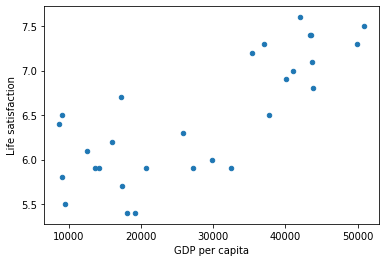

In [7]:
country_stats.plot(kind='scatter', x='GDP per capita', y='Life satisfaction')
plt.show()

In [8]:
lin_reg_model = LinearRegression()

In [9]:
lin_reg_model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
# Make a prediction for Cyprus
X_new = [[22587]] # Cyprus' GDP per capita
print(lin_reg_model.predict(X_new)) # outputs [[ 5.96242338]]

[[6.25984414]]


In [11]:
lin_reg_model = KNeighborsRegressor(n_neighbors=3)

In [12]:
lin_reg_model.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [13]:
# Make a prediction for Cyprus
X_new = [[22587]] # Cyprus' GDP per capita
print(lin_reg_model.predict(X_new)) # outputs [[ 5.96242338]]

[[5.86666667]]
